In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [ ]:
import argparse
import os
import sys
import cv2



from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
FLAGS = None

# 1. 데이터 가져오기

## 1.1 훈련 데이터 가져오기

In [ ]:
img_w = 150
img_h = 200
img_c = 3
num_cls = 7

train_img_dir = '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train'
categories = ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']
extensions = ['jpg']  # lower case only

In [ ]:
def create_image_list(image_dir):
    
    if not os.path.exists(image_dir):
        print('Error:', image_dir, 'is not exist!')
        return None
    
    image_list = []
    for label, category in enumerate(categories):
        filelist = os.listdir(os.path.join(image_dir, category))
        for f in filelist:
            dotext = os.path.splitext(f)[-1]
            ext = dotext[1:]
            if ext.lower() not in extensions:
                continue

            filepath = os.path.join(image_dir, category, f)
            image_list.append([filepath, label])

    return image_list

In [ ]:
def read_image(path):
       
    img = cv2.imread(path) / 255.

    if img.shape != (img_h, img_w):
        img = cv2.resize(img, (img_w, img_h))

    return img.reshape(img_h, img_w, img_c)

In [ ]:
train_list = create_image_list(train_img_dir)

In [ ]:
train_list

In [ ]:
print(train_list)

[['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_306.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_249.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_241.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_225.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_310.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_252.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_309.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_219.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_255.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_257.jpg', 0], ['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/train/dog/pic_236.jpg', 0], ['/content/drive/Othercomputers

In [ ]:
print('Total number of train images:', len(train_list))

Total number of train images: 1698


In [ ]:
len(train_list)

1698

In [ ]:
imgs = []
labels = []
for i in range(len(train_list)):
    imgs.append(read_image(train_list[i][0]))
    labels.append(train_list[i][1])



In [ ]:
t1 = np.array(imgs) # t1: feature data

In [ ]:
t1.shape

(1698, 200, 150, 3)

In [ ]:
t2 = np.array(labels)

In [ ]:
t2.shape # t2: label data

(1698,)

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 

## 1.2 테스트 데이터 가져오기

In [ ]:
img_w = 150
img_h = 200
img_c = 3
num_cls = 7

test_img_dir = '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test'


In [ ]:
def create_image_list2(image_dir):
    
    if not os.path.exists(image_dir):
        print('Error:', image_dir, 'is not exist!')
        return None
    
    image_list2 = []
    
    filelist = os.listdir(os.path.join(image_dir))
    for f in filelist:
        filepath = os.path.join(image_dir,f)
        image_list2.append(filepath)

    return image_list2

In [ ]:
test_list = create_image_list2(test_img_dir)
print(test_list)

['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0288.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0262.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0311.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0246.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0269.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0029.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0327.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0078.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0062.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0104.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0182.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0056.jpg', '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0071.jpg', '/content/drive/Othercom

In [ ]:
test_list[0]

'/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0288.jpg'

In [ ]:
test_list.sort()

In [ ]:
test_list

['/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0001.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0002.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0003.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0004.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0005.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0006.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0007.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0008.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0009.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0010.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0011.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0012.jpg',
 '/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/test/0013.jpg',
 '/content/d

In [ ]:
imgs_t = []
for i in test_list:
    imgs_t.append(read_image(i))

In [ ]:
test_data = np.array(imgs_t)
print(test_data)
print(test_data.shape)

[[[[0.45896268 0.45085484 0.22419798]
   [0.48582196 0.47489834 0.25668882]
   [0.48987582 0.48033334 0.26353595]
   ...
   [0.34315812 0.29409219 0.17977854]
   [0.3014509  0.30448018 0.16917425]
   [0.32270747 0.35009051 0.20512836]]

  [[0.41666497 0.40410614 0.1900081 ]
   [0.43700147 0.42566559 0.21095608]
   [0.41429788 0.40509951 0.18932124]
   ...
   [0.34551217 0.29919353 0.18465488]
   [0.31004042 0.30904755 0.18387115]
   [0.24865586 0.27292177 0.1310174 ]]

  [[0.40810376 0.39241749 0.18722141]
   [0.43061765 0.41995147 0.21275491]
   [0.38327206 0.37373039 0.16668628]
   ...
   [0.35796075 0.31921961 0.20511836]
   [0.32182176 0.31908588 0.19584182]
   [0.27891325 0.29130835 0.15802404]]

  ...

  [[0.15449555 0.17599584 0.10922111]
   [0.14827441 0.17472554 0.09604863]
   [0.13679041 0.165467   0.07263948]
   ...
   [0.2277046  0.29675774 0.41902821]
   [0.16530072 0.23692919 0.36391123]
   [0.18450574 0.28071803 0.34491536]]

  [[0.12459297 0.16163013 0.0992715 ]
   [0.1

# 2. CNN 모델 생성

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


N, n_H, n_W, n_C = 1698, 200, 150, 3
n_conv_neurons = [16,32,64]
n_dense_neurons = [64,128,128]
k_size, padding = 3, 'same'
pool_size, pool_strides = 2, 2
activation = 'relu'


class MyConv(Layer):
    def __init__(self,n_neuron):
        super(MyConv, self).__init__()

        self.conv = Conv2D(filters = n_neuron, kernel_size = k_size, padding = padding, activation = activation)

        self.conv_pool = MaxPooling2D(pool_size= pool_size, strides= pool_strides)

    
    def call(self, x):
        x = self.conv(x)
        x = self.conv_pool(x)
        return(x)


model4 = Sequential()
model4.add(tf.keras.layers.InputLayer(input_shape = (200, 150, 3)))
model4.add(MyConv(n_conv_neurons[0]))
model4.add(MyConv(n_conv_neurons[1]))
model4.add(MyConv(n_conv_neurons[2]))
model4.add(Flatten())

model4.add(Dense(units=n_dense_neurons[0], activation=activation))
model4.add(Dense(units=n_dense_neurons[1], activation=activation))
model4.add(Dense(units=7, activation="softmax"))

"""
dp3_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(200, 150, 3)),
    keras.layers.Conv2D(filters = n_conv_neurons[0], kernel_size=k_size, padding=padding, activation=activation),
    keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Conv2D(filters = n_conv_neurons[1], kernel_size=k_size, padding=padding, activation=activation),
    keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Conv2D(filters = n_conv_neurons[2], kernel_size=k_size, padding=padding, activation=activation),
    keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=n_dense_neurons[0], activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=n_dense_neurons[1], activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(7, activation='softmax')
])
"""


"\ndp3_model = keras.models.Sequential([\n    keras.layers.InputLayer(input_shape=(200, 150, 3)),\n    keras.layers.Conv2D(filters = n_conv_neurons[0], kernel_size=k_size, padding=padding, activation=activation),\n    keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides),\n    keras.layers.Dropout(rate=0.3),\n    keras.layers.Conv2D(filters = n_conv_neurons[1], kernel_size=k_size, padding=padding, activation=activation),\n    keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides),\n    keras.layers.Dropout(rate=0.3),\n    keras.layers.Conv2D(filters = n_conv_neurons[2], kernel_size=k_size, padding=padding, activation=activation),\n    keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides),\n    \n    keras.layers.Flatten(),\n    keras.layers.Dense(units=n_dense_neurons[0], activation='relu'),\n    keras.layers.Dropout(rate=0.3),\n    keras.layers.Dense(units=n_dense_neurons[1], activation='relu'),\n    keras.layers.Dropout(rate=0.3),\n    kera

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_conv_6 (MyConv)          (None, 100, 75, 16)       448       
                                                                 
 my_conv_7 (MyConv)          (None, 50, 37, 32)        4640      
                                                                 
 my_conv_8 (MyConv)          (None, 25, 18, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 28800)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1843264   
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 7)                

In [ ]:
hist = model4.fit(t1,tf.keras.utils.to_categorical(t2, 7),epochs=12,batch_size=32,verbose=1)

Epoch 1/12
54/54 [==============================] - 1s 13ms/step - loss: 1.9048 - acc: 0.2250
Epoch 2/12
54/54 [==============================] - 1s 13ms/step - loss: 1.7912 - acc: 0.2803
Epoch 3/12
54/54 [==============================] - 1s 13ms/step - loss: 1.5802 - acc: 0.4122
Epoch 4/12
54/54 [==============================] - 1s 13ms/step - loss: 1.3908 - acc: 0.4806
Epoch 5/12
54/54 [==============================] - 1s 13ms/step - loss: 1.1190 - acc: 0.5948
Epoch 6/12
54/54 [==============================] - 1s 13ms/step - loss: 0.7553 - acc: 0.7356
Epoch 7/12
54/54 [==============================] - 1s 13ms/step - loss: 0.5045 - acc: 0.8292
Epoch 8/12
54/54 [==============================] - 1s 13ms/step - loss: 0.2709 - acc: 0.9058
Epoch 9/12
54/54 [==============================] - 1s 13ms/step - loss: 0.1269 - acc: 0.9605
Epoch 10/12
54/54 [==============================] - 1s 13ms/step - loss: 0.0589 - acc: 0.9870
Epoch 11/12
54/54 [==============================] - 1s 13m

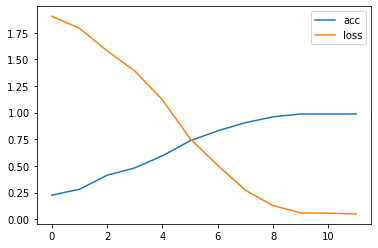

In [ ]:
plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.show()

# 3. 결과 저장하기

In [ ]:
res = model4.predict(test_data[0].reshape(1,200,150,3))
res.shape

(1, 7)

In [ ]:
pred = model4.predict(test_data)
pred.shape

(350, 7)

In [ ]:
pred[0][0]

0.8915701

In [ ]:
accuarcy_list = []
for i in range(len(test_data)):
    id = np.argmax(pred[i])
    accuarcy_list.append(id)



In [ ]:
print(accuarcy_list)

[0, 5, 0, 6, 6, 0, 1, 6, 0, 3, 2, 5, 6, 2, 3, 1, 0, 5, 2, 5, 4, 5, 0, 1, 0, 0, 0, 6, 0, 5, 0, 5, 0, 0, 0, 3, 5, 2, 5, 5, 5, 5, 2, 2, 3, 5, 0, 5, 3, 5, 5, 5, 6, 5, 6, 5, 0, 3, 6, 6, 6, 0, 0, 1, 2, 2, 0, 1, 0, 3, 0, 6, 6, 1, 6, 0, 5, 2, 0, 5, 1, 2, 1, 0, 5, 4, 2, 5, 6, 6, 2, 5, 0, 4, 5, 1, 3, 3, 0, 6, 5, 6, 6, 6, 0, 6, 6, 0, 0, 0, 3, 6, 2, 5, 2, 2, 0, 0, 5, 6, 2, 2, 5, 2, 6, 2, 2, 6, 6, 0, 5, 1, 0, 6, 1, 2, 5, 3, 1, 0, 5, 6, 0, 6, 2, 1, 4, 0, 2, 6, 6, 0, 6, 3, 2, 2, 2, 1, 0, 5, 2, 0, 2, 6, 2, 6, 1, 5, 6, 2, 1, 3, 0, 5, 0, 6, 2, 5, 5, 0, 0, 1, 0, 6, 0, 6, 0, 2, 6, 4, 0, 2, 6, 2, 1, 5, 6, 6, 2, 0, 5, 5, 3, 6, 5, 1, 3, 4, 0, 5, 3, 6, 1, 3, 2, 5, 1, 5, 6, 0, 5, 4, 0, 3, 1, 1, 3, 1, 0, 1, 3, 5, 4, 0, 1, 0, 0, 6, 2, 6, 6, 2, 2, 1, 5, 0, 1, 5, 1, 3, 4, 5, 5, 3, 0, 0, 2, 6, 0, 1, 6, 5, 1, 3, 3, 0, 0, 6, 6, 1, 0, 5, 6, 0, 6, 2, 6, 3, 0, 6, 0, 1, 4, 3, 5, 0, 1, 6, 5, 1, 1, 5, 5, 6, 0, 6, 2, 0, 6, 3, 5, 5, 6, 6, 6, 1, 1, 5, 6, 1, 5, 3, 3, 0, 0, 6, 0, 1, 0, 0, 2, 6, 6, 0, 3, 5, 6, 5, 5, 0, 6, 6, 6, 

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(accuarcy_list, columns=['label'])
df.head()

,label
0,0
1,5
2,0
3,6
4,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   350 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [ ]:
df.to_csv('/content/drive/Othercomputers/ASUS_g531/info/프로그래머스/programmers_art9.csv', sep=',', na_rep='NaN')

